In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


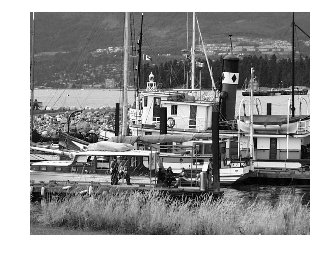

In [23]:
#Load the image
path_to_image = '../tests/images/Gray/Gray_scale.png'
img = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
sr.show_image(img)

In [27]:
#Check if the image is actually grayscale
path_to_image = '../tests/images/Gray/Gray_scale.png'
img2 = cv2.imread(path_to_image)
print sr.image_diff(img2[:,:,0], img, visualize=False)
print sr.image_diff(img2[:,:,1], img, visualize=False)
print sr.image_diff(img2[:,:,2], img, visualize=False)

True
True
True


In [17]:
binarizer = sr.DatadrivenBinarizer( lam=27,
                 area_factor_large=0.001,
                 area_factor_verylarge=0.01,
                 weights=(0.33, 0.33, 0.33),
                 offset=80,
                 num_levels=255,
                 connectivity=8)

stepsize: 1
min:  50
max:  210


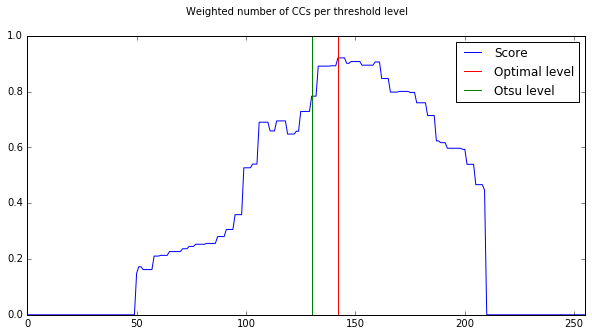

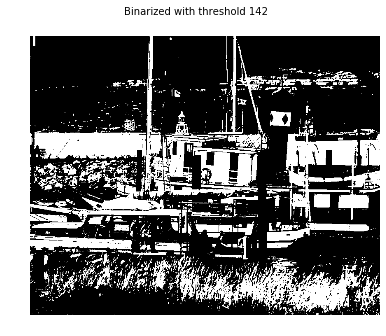

In [28]:
pylab.rcParams['figure.figsize'] = (10., 5.)
t, binarized = binarizer.binarize_withthreshold(img, visualize=True)

In [16]:
print "threshold: ", t, "true threshold:", 146

threshold:  142 true threshold: 146


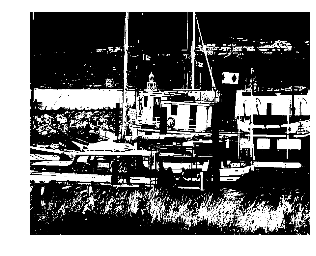

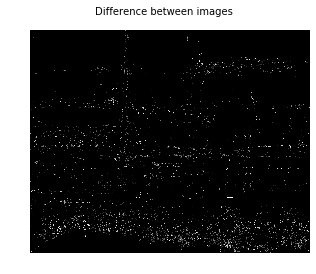

False

In [9]:
binarized_true = cv2.imread('../tests/images/Gray/Binarization_data_driven.png', cv2.IMREAD_GRAYSCALE)
sr.show_image(binarized_true)
sr.image_diff(binarized, binarized_true)

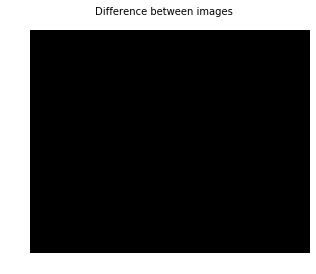

True

In [12]:
#See if the matlab image is binarized according to the threshold that it should
_, binarized146 = cv2.threshold(img, 146, 255, cv2.THRESH_BINARY)
sr.image_diff(binarized146, binarized_true)

146
147


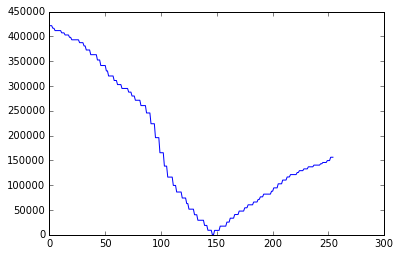

In [10]:
differences = np.zeros(255)
for t in xrange(0, 255):
    _, binarized_t = cv2.threshold(img, t, 255, cv2.THRESH_BINARY)
    differences[t] = sum(cv2.bitwise_xor(binarized_t, binarized_true))/255
    if sr.image_diff(binarized_t, binarized_true, visualize=False):
       print t
plt.plot(differences)

In [11]:
print differences.argmin(), differences.min()

146 0.0


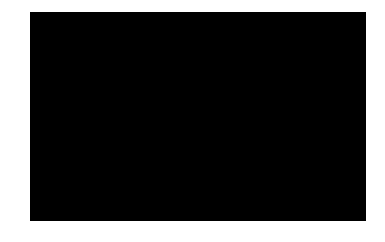

In [48]:
sr.show_image(binarized_t)